In [15]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [16]:
dt_hoje = '2024-08-08'

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Funções

In [18]:
def drop_unnamed_cols(df):
    cols = df.columns
    cols_unnamed = [col for col in cols if str(col).startswith('Unnamed')]

    columns_to_drop = df[cols_unnamed].dropna(axis=1, how='all').columns

    return df.drop(columns=columns_to_drop)



def drop_null_cols(df):
    return df.dropna(axis=1, how='all')



def read_all_tables(dirname):
    all_dfs = {}

    list_files = os.listdir(dirname)

    for file_ in list_files:
        if file_.endswith(".csv"):
            file_name = os.path.splitext(file_)[0]
            df = pd.read_csv(os.path.join(dirname, file_))
            df_cleanned = drop_unnamed_cols(df)
            df_cleanned = drop_null_cols(df_cleanned)
            all_dfs[file_name] = df_cleanned

            print(file_)

    return all_dfs



def print_keys_with_column(data_dict, column_name):
    for key, df in data_dict.items():
        if column_name in df.columns:
            print(key)



def print_keys_with_column_like(data_dict, column_name_like):
    for key, df in data_dict.items():
        matching_columns = [col for col in df.columns if column_name_like in col]
        if matching_columns:
            print(key)



def search_tables_use_column(ls_data_dict, type_search, column_name):
    if type_search == 'like':
        for dict_data in ls_data_dict:
            print_keys_with_column_like(dict_data, column_name)
    elif type_search == 'exact':
        for dict_data in ls_data_dict:
            print_keys_with_column(dict_data, column_name)
    else:
        raise ValueError("Tipo de busca não suportado. Use 'like' ou 'exact'.")



def plot_qtd_stack_bar(df, x, y, group, figsize=(20,10), colors=None):
    # Se a group for nulo o gráfico de barras pode ver utilizado sem criar grupos dentro das barras
    if group:
        agg_tips = df.groupby([x, group])[y].count().unstack().fillna(0)
    else:
        agg_tips = df.groupby([x])[y].count().fillna(0).to_frame()

    fig, ax = plt.subplots(figsize=figsize)

    # colors = ['#008080', '#DAA520','#8A2BE2','#0000FF']
    if colors:
        pass
    else:
        colors = [None for i in range(agg_tips.shape[1])]

    bottom = np.zeros(len(agg_tips))

    lst_index = [str(i) for i in agg_tips.index]

    for i, col in enumerate(agg_tips.columns):
        ax.bar(
          lst_index, agg_tips[col], bottom=bottom, label=col, edgecolor = "black", color=colors[i]) #, color=colors[i]
        bottom += np.array(agg_tips[col])

    # Coloca o label de qtd de observações acima das barras.
    totals = agg_tips.sum(axis=1)
    lst_index_total = [str(i) for i in totals.index]
    y_offset = 5
    for i, total in enumerate(totals):
        ax.text(lst_index_total[i], total + y_offset, round(total), ha='center', weight='bold')

    # Se group é nulo não colocamos o label de qtd de observações dentro da barra
    if group:
        # Let's put the annotations inside the bars themselves by using a
        # negative offset.
        y_offset = -100
        # For each patch (basically each rectangle within the bar), add a label.
        for bar in ax.patches:
            ax.text(
                # Put the text in the middle of each bar. get_x returns the start
                # so we add half the width to get to the middle.
                bar.get_x() + bar.get_width() / 2,
                # Vertically, add the height of the bar to the start of the bar,
                # along with the offset.
                bar.get_y() + bar.get_height() / 2, #bar.get_height() + bar.get_y() + y_offset,
                # This is actual value we'll show.
                round(bar.get_height()),
                # Center the labels and style them a bit.
                ha='center',
                color='w',
                weight='bold',
                size=8
            )

        ax.set_title(f'Qtd de {y} por {group}')
        ax.legend()
        plt.xticks(rotation=90)

    else:
        ax.set_title(f'Qtd de {y}')
        ax.legend()
        plt.xticks(rotation=90)



def plot_porcentagem_stack_bar(df, x, y, group, figsize=(20,10)):
    agg_tips = df.groupby([x, group])[y].count().unstack().fillna(0)
    totals = agg_tips.sum(axis=1)
    agg_tips = agg_tips.div(totals, axis='index').mul(100)

    fig, ax = plt.subplots(figsize=figsize)

    # colors = ['#008080', '#DAA520','#8A2BE2','#0000FF']
    bottom = np.zeros(len(agg_tips))

    lst_index = [str(i) for i in agg_tips.index]

    for i, col in enumerate(agg_tips.columns):
        ax.bar(
          lst_index, agg_tips[col], bottom=bottom, label=col, edgecolor = "black") # , color=colors[i]

        bottom += np.array(agg_tips[col])

    # For each patch (basically each rectangle within the bar), add a label.
    for bar in ax.patches:
        ax.text(
            # Put the text in the middle of each bar. get_x returns the start
            # so we add half the width to get to the middle.
            bar.get_x() + bar.get_width() / 2,
            # Vertically, add the height of the bar to the start of the bar,
            # along with the offset.
            bar.get_y() + bar.get_height() / 2, #bar.get_height() + bar.get_y() + y_offset,
            # This is actual value we'll show.
            round(bar.get_height()),
            # Center the labels and style them a bit.
            ha='center',
            color='w',
            weight='bold',
            size=8
        )

    ax.set_title(f'Porcentagem de matriculas por {group}')
    ax.legend()
    plt.xticks(rotation=90)


# Lendo todas as tabelas

In [19]:
TbOutras = read_all_tables("/content/drive/MyDrive/Pos tech/datathon/csv_output/Tabelas/Outras tabelas/")
TbAbatimento = read_all_tables("/content/drive/MyDrive/Pos tech/datathon/csv_output/Tabelas/TbAbatimento/Originais anonimizados")
TbAlunos = read_all_tables("/content/drive/MyDrive/Pos tech/datathon/csv_output/Tabelas/TbAluno/Originais anonimizados")
TbCampoDinamico = read_all_tables("/content/drive/MyDrive/Pos tech/datathon/csv_output/Tabelas/TbCampoDinamico/Originais anonimizados")
TbCaptacao = read_all_tables("/content/drive/MyDrive/Pos tech/datathon/csv_output/Tabelas/TbCaptacao/Originais anonimizados")
TbDiario = read_all_tables("/content/drive/MyDrive/Pos tech/datathon/csv_output/Tabelas/TbDiario/Originais anonimizados")
TbFase = read_all_tables("/content/drive/MyDrive/Pos tech/datathon/csv_output/Tabelas/TbFase/Originais anonimizados")
TbHistorico = read_all_tables("/content/drive/MyDrive/Pos tech/datathon/csv_output/Tabelas/TbHistorico/Originais anonimizados")
TbMeta = read_all_tables("/content/drive/MyDrive/Pos tech/datathon/csv_output/Tabelas/TbMeta")
TbProfessor = read_all_tables("/content/drive/MyDrive/Pos tech/datathon/csv_output/Tabelas/TbProfessor/Originais anonimizados")
TbResponsavel = read_all_tables("/content/drive/MyDrive/Pos tech/datathon/csv_output/Tabelas/TbResponsavel/Originais anonimizados")
TbSerie = read_all_tables("/content/drive/MyDrive/Pos tech/datathon/csv_output/Tabelas/TbSerie/Originais anonimizados")
TbSituacaoAlunoDisciplina = read_all_tables("/content/drive/MyDrive/Pos tech/datathon/csv_output/Tabelas/TbSituacaoAlunoDisciplina/Originais anonimizados")
TbTurma = read_all_tables("/content/drive/MyDrive/Pos tech/datathon/csv_output/Tabelas/TbTurma/Originais anonimizados")
lst_todos_dados = [TbOutras, TbAbatimento, TbAlunos, TbCampoDinamico, TbCaptacao, TbDiario, TbFase, TbHistorico, TbMeta, TbProfessor, TbResponsavel, TbSerie, TbSituacaoAlunoDisciplina, TbTurma]

DictTodasTabelas = (TbOutras | TbAbatimento | TbAlunos | TbCampoDinamico | TbCaptacao | TbDiario | TbFase | TbHistorico | TbMeta | TbProfessor | TbResponsavel | TbSerie | TbSituacaoAlunoDisciplina | TbTurma)

TbPais.csv
TbMunicipio.csv
TbDisciplina.csv
TbCentroResultado.csv
TbPeriodo.csv
TbMotivoInativacao.csv
TbFormaIngresso.csv
TbFreqQuadroHorario.csv
TbCursoFases.csv
TbTipoOcorrencia.csv
TbGradeCurricular.csv
TbAbatimentoTipo.csv
TbAbatimento.csv
TbAlunoRotinaEducacaoInfantil.csv
TbAlunoTurmaHistorico.csv
TbAlunoProprioResponsavel.csv
TbAlunoObs.csv
TbAluno.csv
TbAlunoTurma.csv
TbCampoDinamicoConjuntoElemento.csv
TbCampoDinamico.csv
TbCampoDinamicoConjunto.csv
TbCaptacaoCursoInteresse.csv
TbCaptacaoMotivoDesistencia.csv
TbCaptacaoSituacaoLead.csv
TbCaptacaoOrigemLead.csv
TbDiarioFrequencia.csv
TbDiarioAluno.csv
TbDiario.csv
TbDiarioAula.csv
TbFaseNotaAluno.csv
TbFaseNota.csv
TbFaseNotaDisciplinaTurma.csv
TbFaseNotaOrigemDestino.csv
TbHistorico.csv
TbHistoricoNotas.csv
TbMeta.csv
TbMetaFaseNota.csv
TbMetaFaseNotaAluno.csv
TbMetaSituacaoAlunoDisciplina.csv
TbTipoMeta.csv
TbMetaConceito.csv
TbProfessorDisciplina.csv
TbProfessorHorario.csv
TbProfessor.csv
TbTipoVinculoAlunoResponsavel.csv
Tb

In [20]:
# Dataframes importantes
alunos_turmas_df = TbAlunos['TbAlunoTurma']
alunos_df = TbAlunos['TbAluno']
turmas_df = TbTurma['TbTurma']
situacao_aluno_turma_df = TbTurma['TbSituacaoAlunoTurma']
motivos_inat_df = TbOutras['TbMotivoInativacao']

In [21]:
# Lista de motivos que parecem ter relação com um problema de adaptação com a metodologia
lst_motivos_inativacao_sem_adaptacao = [1,6,15,18]

In [22]:
alunos_turmas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9157 entries, 0 to 9156
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   IdTurma                         9157 non-null   int64  
 1   IdAluno                         9157 non-null   int64  
 2   IdSituacaoAlunoTurma            9157 non-null   int64  
 3   DataSituacaoAtivo               9120 non-null   object 
 4   DataSituacaoInativo             7313 non-null   object 
 5   OrdemChamada                    9157 non-null   int64  
 6   DataHoraEfetivacaoMatricula     9120 non-null   object 
 7   IdUsuarioEfetivacaoMatricula    5010 non-null   float64
 8   ProblemaAutorizadoMatricula     2925 non-null   object 
 9   IdUsuarioAutorizacaoMatricula   2646 non-null   float64
 10  StAlunoTurmaNaoPermitePParcial  9157 non-null   bool   
 11  IdResponsavelFinanceiro         9138 non-null   float64
 12  IdTipoResponsavelFinanceiro     91

In [23]:
alunos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2238 entries, 0 to 2237
Data columns (total 45 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   IdAluno                                 2238 non-null   int64  
 1   NomeAluno                               2238 non-null   object 
 2   IdUnidade                               2237 non-null   float64
 3   Sexo                                    2237 non-null   object 
 4   EstadoCivil                             2237 non-null   float64
 5   DataNascimento                          2238 non-null   object 
 6   IdPai                                   800 non-null    float64
 7   IdMae                                   1218 non-null   object 
 8   IdResponsavel                           2237 non-null   float64
 9   IdTipoResponsavel                       2238 non-null   int64  
 10  Naturalidade                            1 non-null      obje

In [24]:
print("Qtd linhas:", alunos_turmas_df.shape[0])
print("Qtd de alunos:", alunos_turmas_df['IdAluno'].nunique())
print("Qtd de turmas:", alunos_turmas_df['IdTurma'].nunique())
print("Qtd de aluno e turmas:", alunos_turmas_df['IdAlunoTurma'].nunique())
print("Qtd de aluno e turmas:", alunos_turmas_df[['IdAluno','IdTurma']].drop_duplicates().shape[0])

Qtd linhas: 9157
Qtd de alunos: 2163
Qtd de turmas: 474
Qtd de aluno e turmas: 9157
Qtd de aluno e turmas: 9157


In [25]:
# Qtd de turmas por aluno
alunos_turmas_df.groupby('IdAluno')['IdTurma'].nunique().describe()

,IdTurma
count,2163.000000
mean,4.233472
std,2.876192
min,1.000000
25%,2.000000
50%,4.000000
75%,6.000000
max,14.000000


In [26]:
## Adicionando situação da turma
alunos_turmas_df = alunos_turmas_df.merge(situacao_aluno_turma_df[['IdSituacaoAlunoTurma','SituacaoAlunoTurma']], on='IdSituacaoAlunoTurma', how='left')
# alunos_turmas_df.info()

print("Qtd linhas:", alunos_turmas_df.shape[0])

Qtd linhas: 9157


## Criando e tratando colunas colunas

In [27]:
alunos_turmas_df['DataSituacaoAtivo'] = pd.to_datetime(alunos_turmas_df['DataSituacaoAtivo'])
alunos_turmas_df['DataSituacaoInativo'] = pd.to_datetime(alunos_turmas_df['DataSituacaoInativo'])
alunos_turmas_df['DataHoraEfetivacaoMatricula'] = pd.to_datetime(alunos_turmas_df['DataHoraEfetivacaoMatricula'])
alunos_turmas_df['AnoMesAtivo'] = alunos_turmas_df['DataSituacaoAtivo'].dt.strftime('%Y%m').astype('Int64')
alunos_turmas_df['AnoMesInativo'] = alunos_turmas_df['DataSituacaoInativo'].dt.strftime('%Y%m').astype('Int64')
alunos_turmas_df['AnoMesEfetivacaoMatricula'] = alunos_turmas_df['DataHoraEfetivacaoMatricula'].dt.strftime('%Y%m').astype('Int64')
alunos_turmas_df['AnoMesRefFeatures'] = (alunos_turmas_df['DataSituacaoAtivo'] + pd.DateOffset(months=-1)).dt.strftime('%Y%m').astype('Int64')
alunos_turmas_df['DifDiasInativoAtivo'] = (alunos_turmas_df['DataSituacaoInativo'] - alunos_turmas_df['DataSituacaoAtivo']).dt.days
alunos_turmas_df['DifDiasInativoMatricula'] = (alunos_turmas_df['DataSituacaoInativo'] - alunos_turmas_df['DataHoraEfetivacaoMatricula']).dt.days
alunos_turmas_df['Inativacao'] = np.where(alunos_turmas_df['DataSituacaoInativo'].notnull(), 'Sim', 'Não')
alunos_turmas_df['InativacaoPorFaltaAdaptacao'] = np.where(alunos_turmas_df['IdMotivoInativacao'].isin(lst_motivos_inativacao_sem_adaptacao), 'Sim', 'Não')
alunos_turmas_df['Desistente'] = np.where(alunos_turmas_df['IdSituacaoAlunoTurma'] == 14, 'Sim', 'Não')
alunos_turmas_df['TargetPorFaltaAdaptacao'] = np.where(alunos_turmas_df['InativacaoPorFaltaAdaptacao'] == 'Sim', 1, 0)
alunos_turmas_df['TargetDesistente'] = np.where(alunos_turmas_df['Desistente'] == 'Sim', 1, 0)


## Analisando

In [28]:
pd.crosstab(alunos_turmas_df['Inativacao'], alunos_turmas_df['Desistente'])

Desistente,Não,Sim
Inativacao,,
Não,1844,0
Sim,5768,1545


In [29]:
pd.crosstab(index=alunos_turmas_df['Inativacao'], columns=[alunos_turmas_df['Desistente'], alunos_turmas_df['InativacaoPorFaltaAdaptacao']])

Desistente                    Não       Sim     
InativacaoPorFaltaAdaptacao   Não Sim   Não  Sim
Inativacao                                      
Não                          1844   0     0    0
Sim                          5748  20  1281  264

In [31]:
# Existem alunos com datas de matriculas difentes ?
alunos_turmas_df[['IdAluno','DataHoraEfetivacaoMatricula']].drop_duplicates().groupby(
    'IdAluno')['DataHoraEfetivacaoMatricula'].nunique().sort_values()#.describe()

,DataHoraEfetivacaoMatricula
IdAluno,
2262,0
2242,0
2243,0
2244,0
2245,0
...,...
142,13
269,13
270,13


In [32]:
# Data máxima e mínima para quem teve inativação
alunos_turmas_df.groupby('InativacaoPorFaltaAdaptacao').agg(MIN_DATE=('DataSituacaoInativo','min'), MAX_DATE=('DataSituacaoInativo','max'))

,MIN_DATE,MAX_DATE
InativacaoPorFaltaAdaptacao,,
Não,2021-08-24,2024-06-28 16:01:00
Sim,2021-09-15,2024-06-21 15:43:00


In [33]:
# Data máxima e mínima para quem teve inativação
alunos_turmas_df.groupby('Desistente').agg(MIN_DATE=('DataSituacaoInativo','min'), MAX_DATE=('DataSituacaoInativo','max'))

,MIN_DATE,MAX_DATE
Desistente,,
Não,2021-12-31,2024-05-31 18:34:00
Sim,2021-08-24,2024-06-28 16:01:00


In [34]:
# Qtd de linhas com data de matricula < do que data de ativação ?
alunos_turmas_df[alunos_turmas_df['DataHoraEfetivacaoMatricula'] < alunos_turmas_df['DataSituacaoAtivo']].shape[0]

7

In [39]:
# Qtd de linhas com data de matricula >= do que data de ativação ?
alunos_turmas_df[alunos_turmas_df['DataHoraEfetivacaoMatricula'] > alunos_turmas_df['DataSituacaoAtivo']].shape[0]

9092

In [125]:
# Qtd média de dias entre os ativar e inativar
# alunos_turmas_df.groupby('InativacaoPorFaltaAdaptacao').agg(MEDIA_DIAS=('DifDiasInativoAtivo','mean'))
alunos_turmas_df.groupby('InativacaoPorFaltaAdaptacao').describe()['DifDiasInativoAtivo']

,count,mean,min,25%,50%,75%,max,std
InativacaoPorFaltaAdaptacao,,,,,,,,
Não,7029.0,322.680751,44.0,364.00,364.0,364.0,364.0,85.874040
Sim,284.0,195.147887,57.0,142.25,172.0,248.0,349.0,73.044345


In [83]:
# Qtd média de dias entre os ativar e inativar
alunos_turmas_df.groupby('Desistente').describe()['DifDiasInativoAtivo']

,count,mean,min,25%,50%,75%,max,std
Desistente,,,,,,,,
Não,5768.0,354.591193,45.0,364.0,364.0,364.0,364.0,46.265726
Sim,1545.0,180.105502,44.0,126.0,163.0,240.0,363.0,73.459797


In [84]:
# Qtd média de dias entre matricula e inativação
alunos_turmas_df.groupby('InativacaoPorFaltaAdaptacao').describe()['DifDiasInativoMatricula']

,count,mean,min,25%,50%,75%,max,std
InativacaoPorFaltaAdaptacao,,,,,,,,
Não,7029.0,223.775075,-1.0,140.0,271.0,316.00,347.0,97.783839
Sim,284.0,115.989437,0.0,72.0,103.0,159.25,293.0,64.922758


In [85]:
# Qtd média de dias entre matricula e inativação
alunos_turmas_df.groupby('Desistente').describe()['DifDiasInativoMatricula']

,count,mean,min,25%,50%,75%,max,std
Desistente,,,,,,,,
Não,5768.0,249.463419,8.0,167.0,277.0,317.0,347.0,83.572874
Sim,1545.0,108.058900,-1.0,56.0,97.0,154.0,333.0,66.939061


In [102]:
alunos_turmas_df[alunos_turmas_df['DifDiasInativoMatricula'] == 0].T

,3959,6404
IdTurma,217,588
IdAluno,2,257
IdSituacaoAlunoTurma,14,14
DataSituacaoAtivo,2022-01-01 00:00:00,2023-01-01 00:00:00
DataSituacaoInativo,2022-04-27 00:00:00,2023-03-16 12:14:00
OrdemChamada,1,13
DataHoraEfetivacaoMatricula,2022-04-27 00:00:00,2023-03-15 16:36:00
IdUsuarioEfetivacaoMatricula,299.0,15.0
ProblemaAutorizadoMatricula,NaN,NaN
IdUsuarioAutorizacaoMatricula,NaN,NaN


In [87]:
motivos_inat_df

,IdMotivoInativacao,MotivoInativacao
0,1,Desinteresse / Falta de retorno
1,2,Falta de retorno as nossas tentativas de contato
2,4,Conflito com horário escolar / período integral
3,5,Mudou de bairro/cidade/distância
4,6,Não se adaptou as aulas/não acompanhou
5,7,Outras prioridades/trabalho
6,8,Conhecimento acima da fase atual
7,9,Sem condição financeira para o transporte público
8,10,Sem responsável p/ levar a criança até a unidade
9,11,Idade incompatível com a fase atual


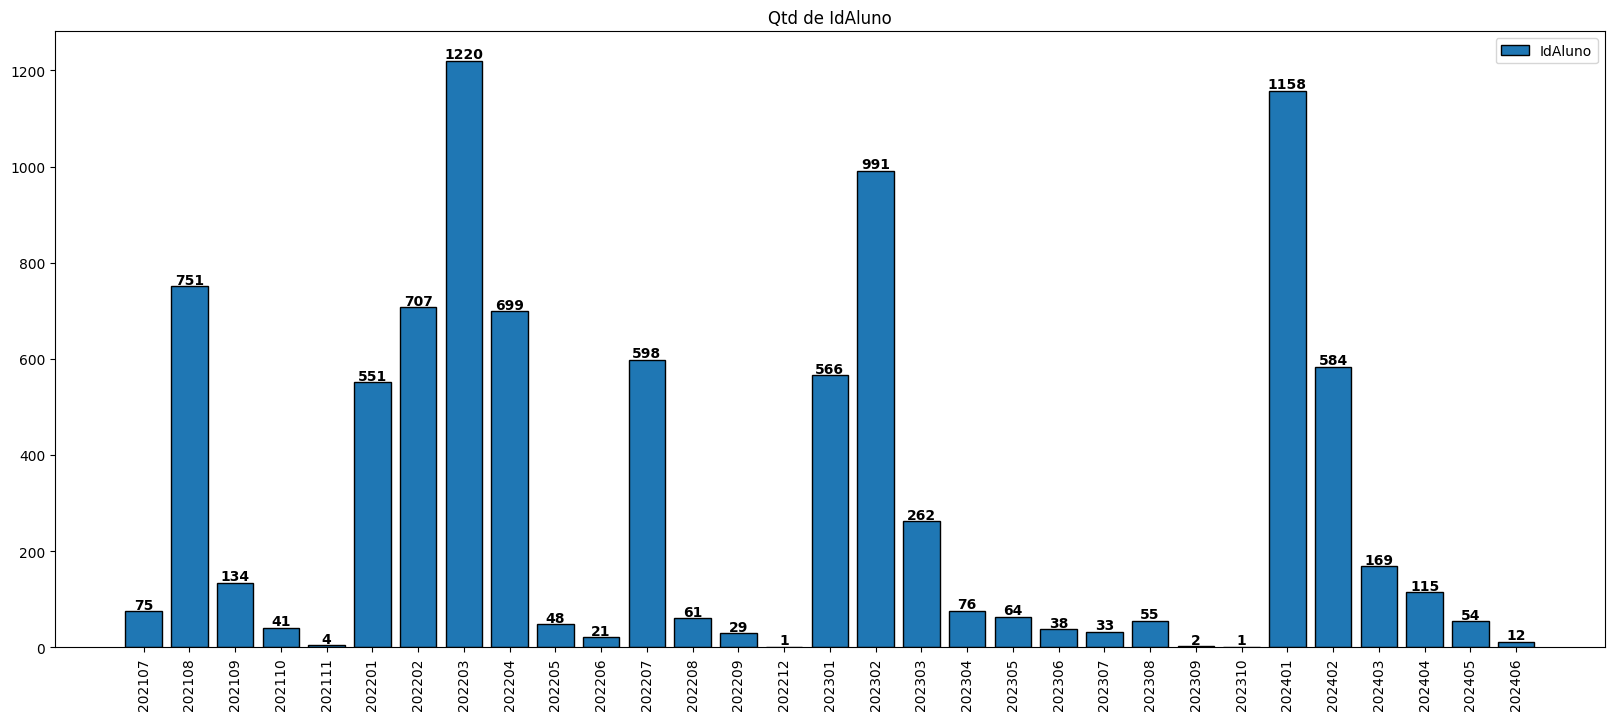

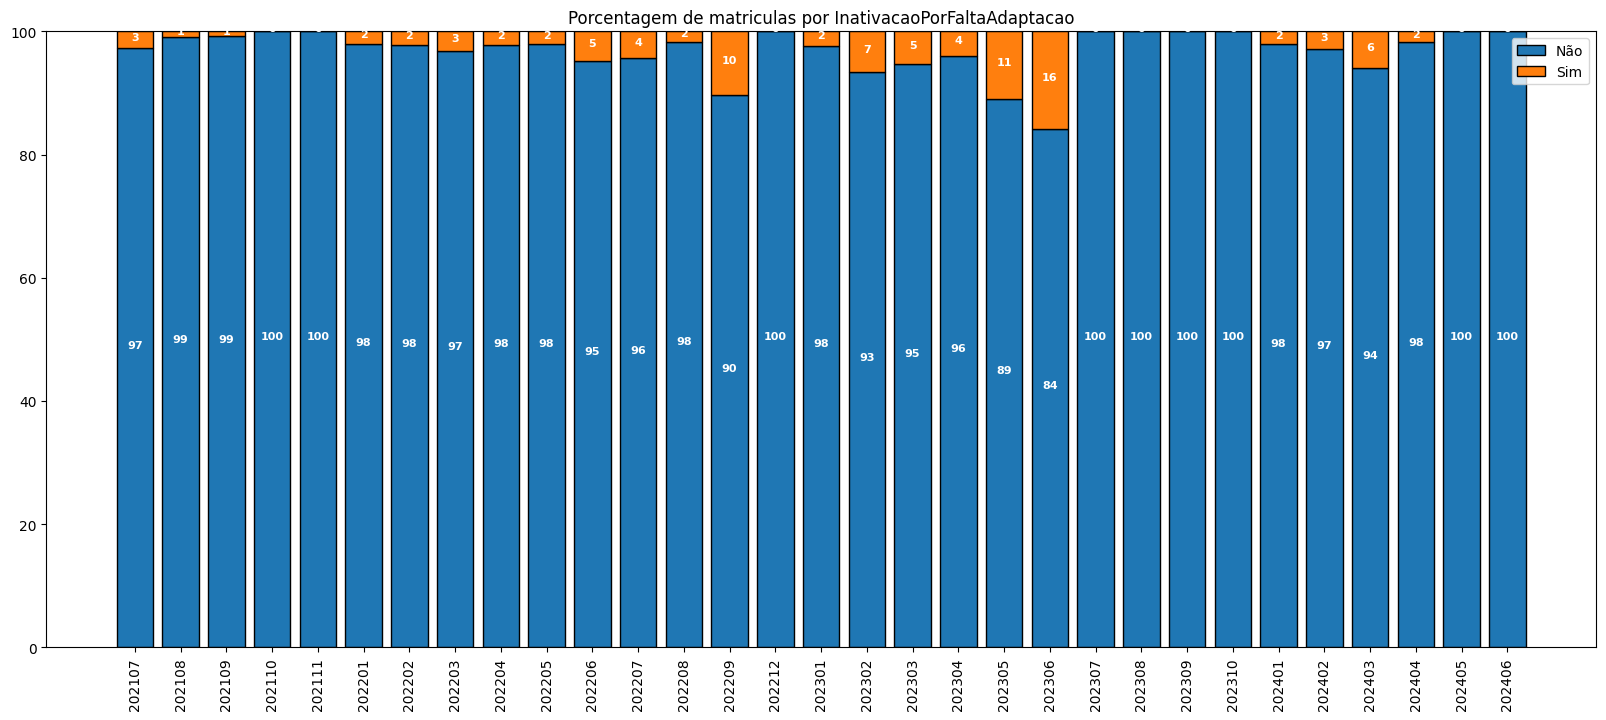

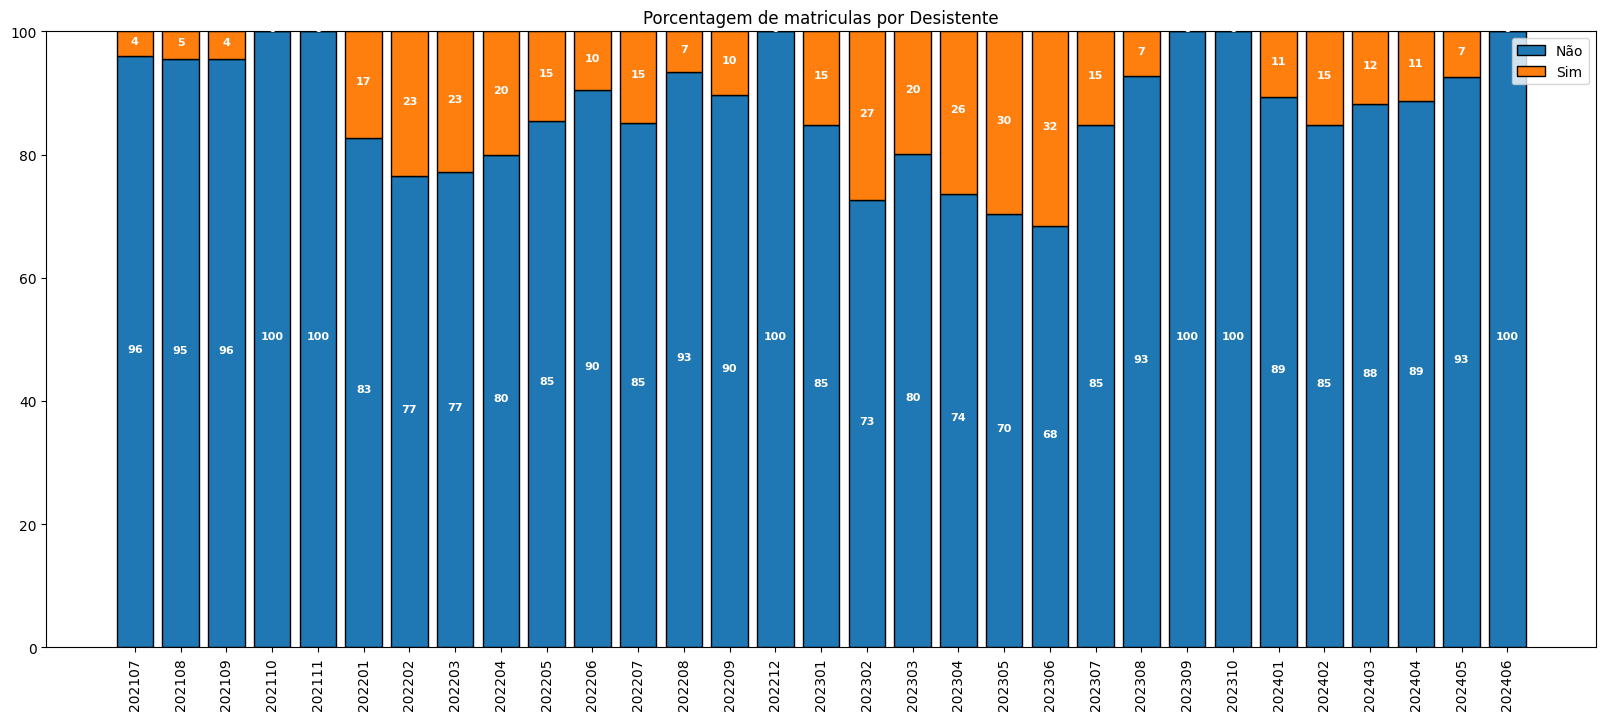

In [94]:
# Qtd de alunos por ano e mês da matricula
plot_qtd_stack_bar(alunos_turmas_df, x='AnoMesEfetivacaoMatricula', y='IdAluno', group=None, figsize=(20,8))
# % qtd de alunos por ano e mês da inativação
plot_porcentagem_stack_bar(df=alunos_turmas_df, x='AnoMesEfetivacaoMatricula', y='IdAluno', group='InativacaoPorFaltaAdaptacao', figsize=(20,8))
# % qtd de alunos por ano e mês de desistente
plot_porcentagem_stack_bar(df=alunos_turmas_df, x='AnoMesEfetivacaoMatricula', y='IdAluno', group='Desistente', figsize=(20,8))

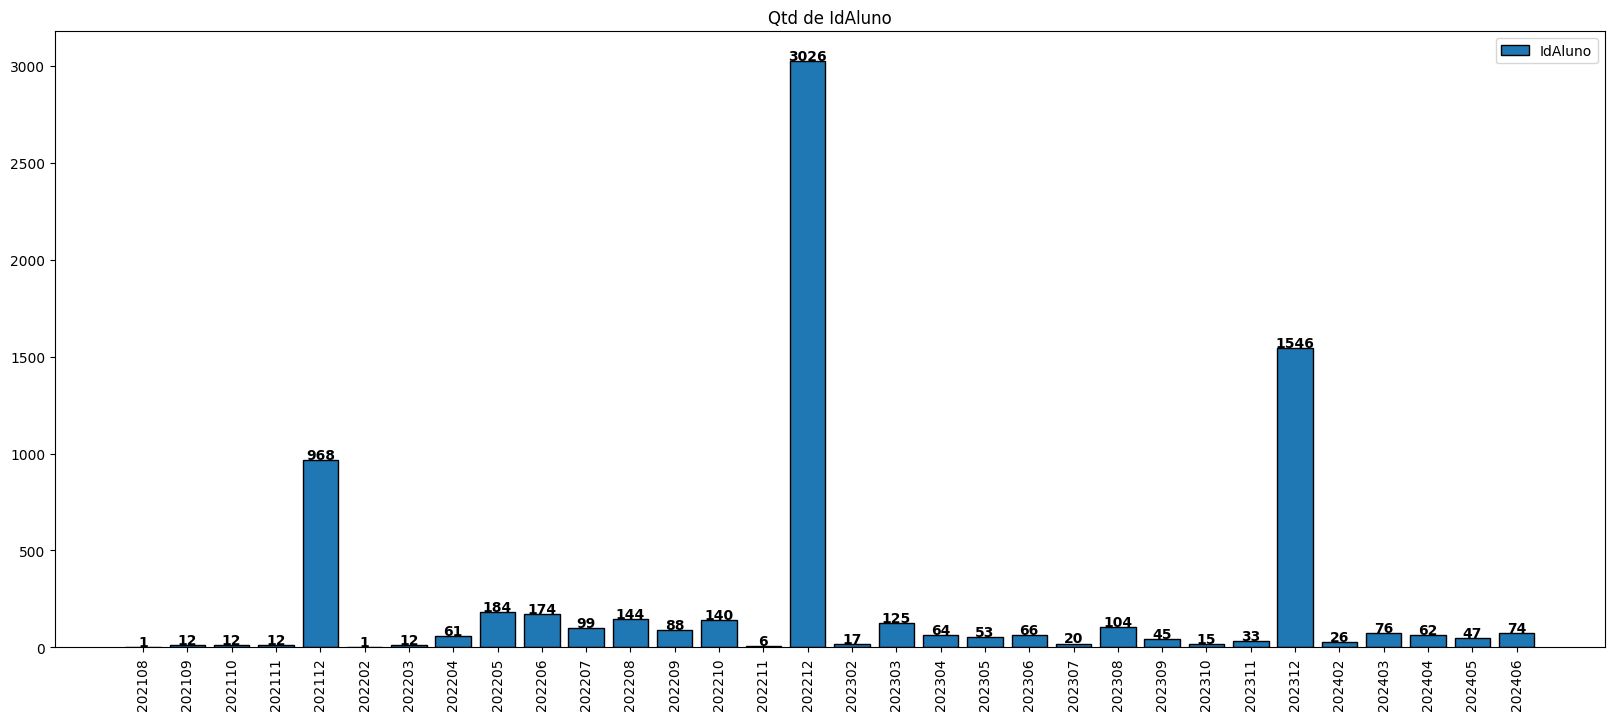

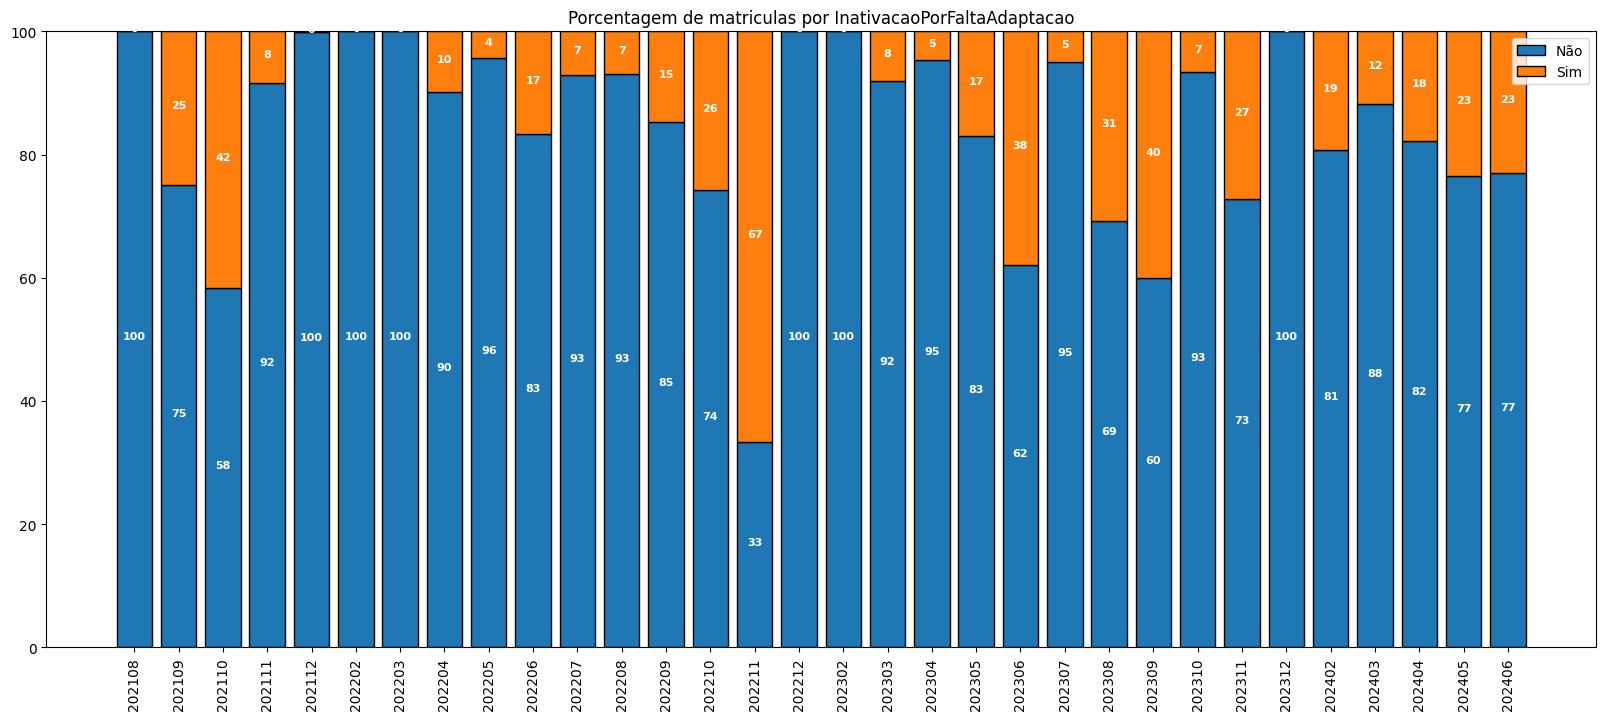

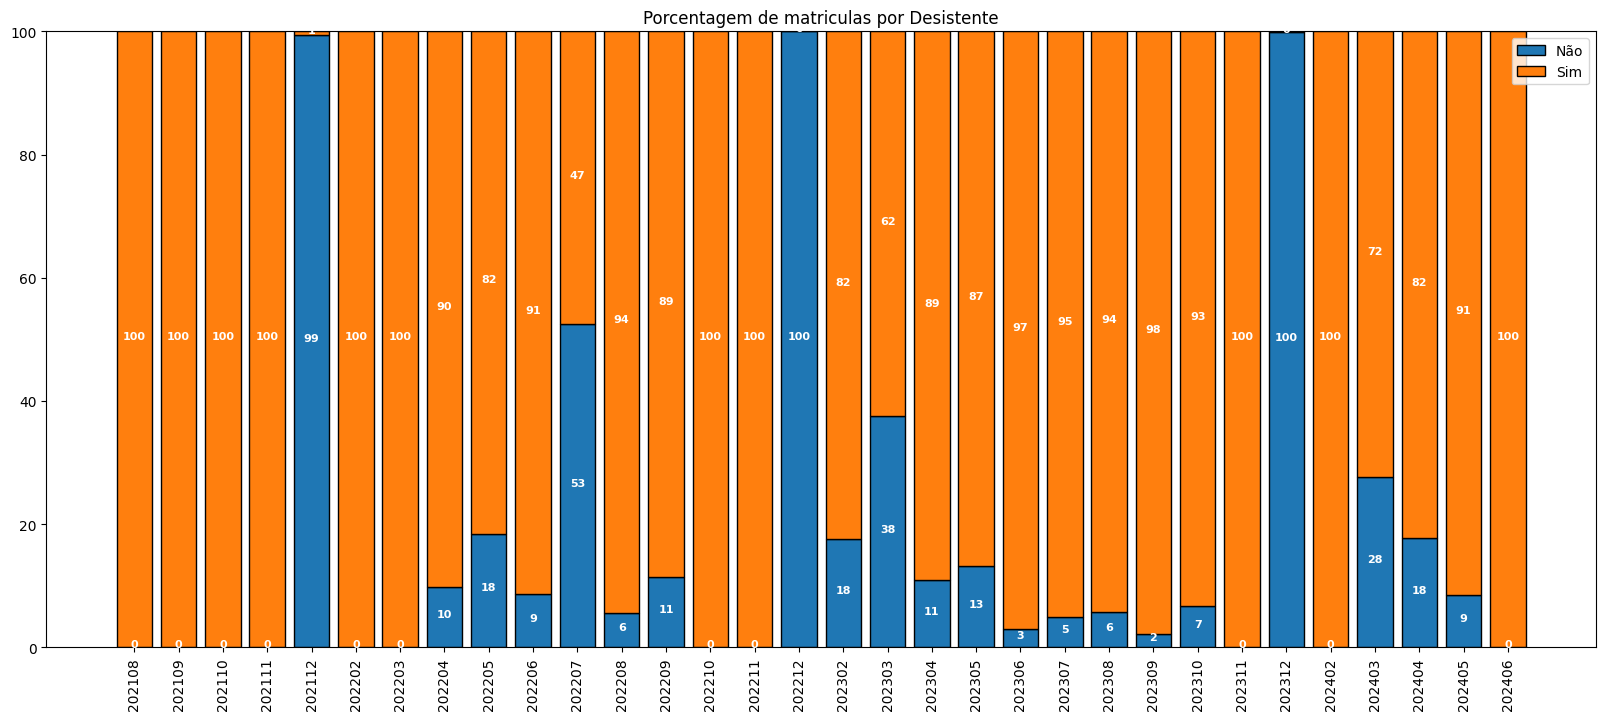

In [95]:
# Qtd de alunos por ano e mês da inativação
plot_qtd_stack_bar(alunos_turmas_df, x='AnoMesInativo', y='IdAluno', group=None, figsize=(20,8))
# % qtd de alunos por ano e mês da inativação
plot_porcentagem_stack_bar(df=alunos_turmas_df, x='AnoMesInativo', y='IdAluno', group='InativacaoPorFaltaAdaptacao', figsize=(20,8))
# % qtd de alunos por ano e mês de desistente
plot_porcentagem_stack_bar(df=alunos_turmas_df, x='AnoMesInativo', y='IdAluno', group='Desistente', figsize=(20,8))

In [35]:
# Qtd de alunos e turma por situação
alunos_turmas_df.groupby('SituacaoAlunoTurma')['IdAlunoTurma'].nunique()

,IdAlunoTurma
SituacaoAlunoTurma,
Aprovado P. Parcial,71
Cursando,1807
Desistente,1545
Mudança de Fase,236
Pré-matrícula,37
Reprovado,27
Troca de Fase *Anual,5434


## Premissas

In [36]:
# Remover linhas com IdSituacaoAlunoTurma estão ativos, pre-matriculas ou em lista de espera
filtro_situacao_aluno_turma = ~(alunos_turmas_df['IdSituacaoAlunoTurma'].isin([1,5,15,16]))
# Trabalhar apenas com aluno matriculado (DataHoraEfetivacaoMatricula NOT NULL)
filtro_matriculado = alunos_turmas_df['DataHoraEfetivacaoMatricula'].notnull()

# Filtrar o DataFrame com base nas condições
alunos_turmas_filtered_df = alunos_turmas_df[filtro_situacao_aluno_turma & filtro_matriculado]

print("Qtd linhas alunos_turmas_df:", alunos_turmas_df.shape[0])
print("Qtd linhas alunos_turmas_filtered_df:", alunos_turmas_filtered_df.shape[0])

Qtd linhas alunos_turmas_df: 9157
Qtd linhas alunos_turmas_filtered_df: 7313


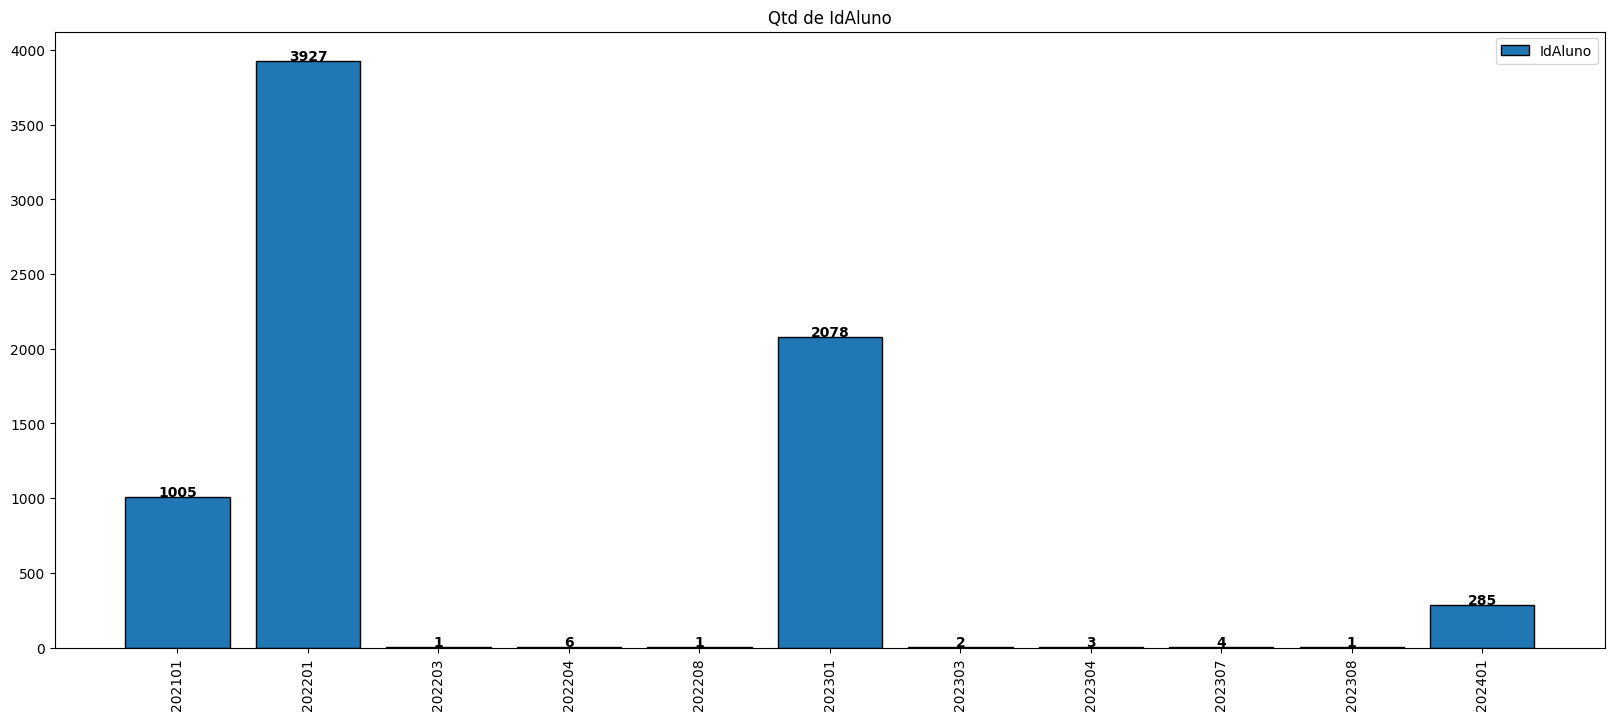

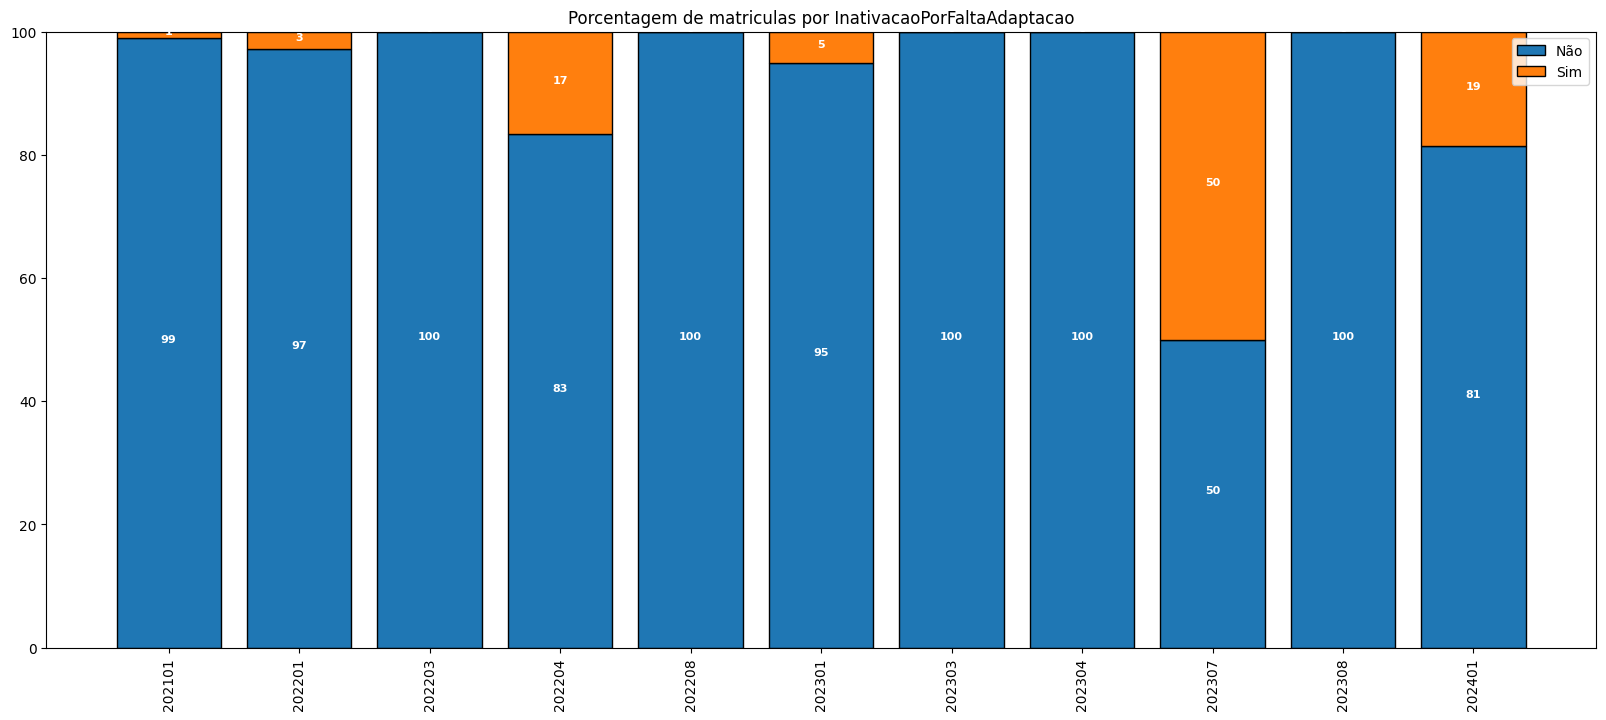

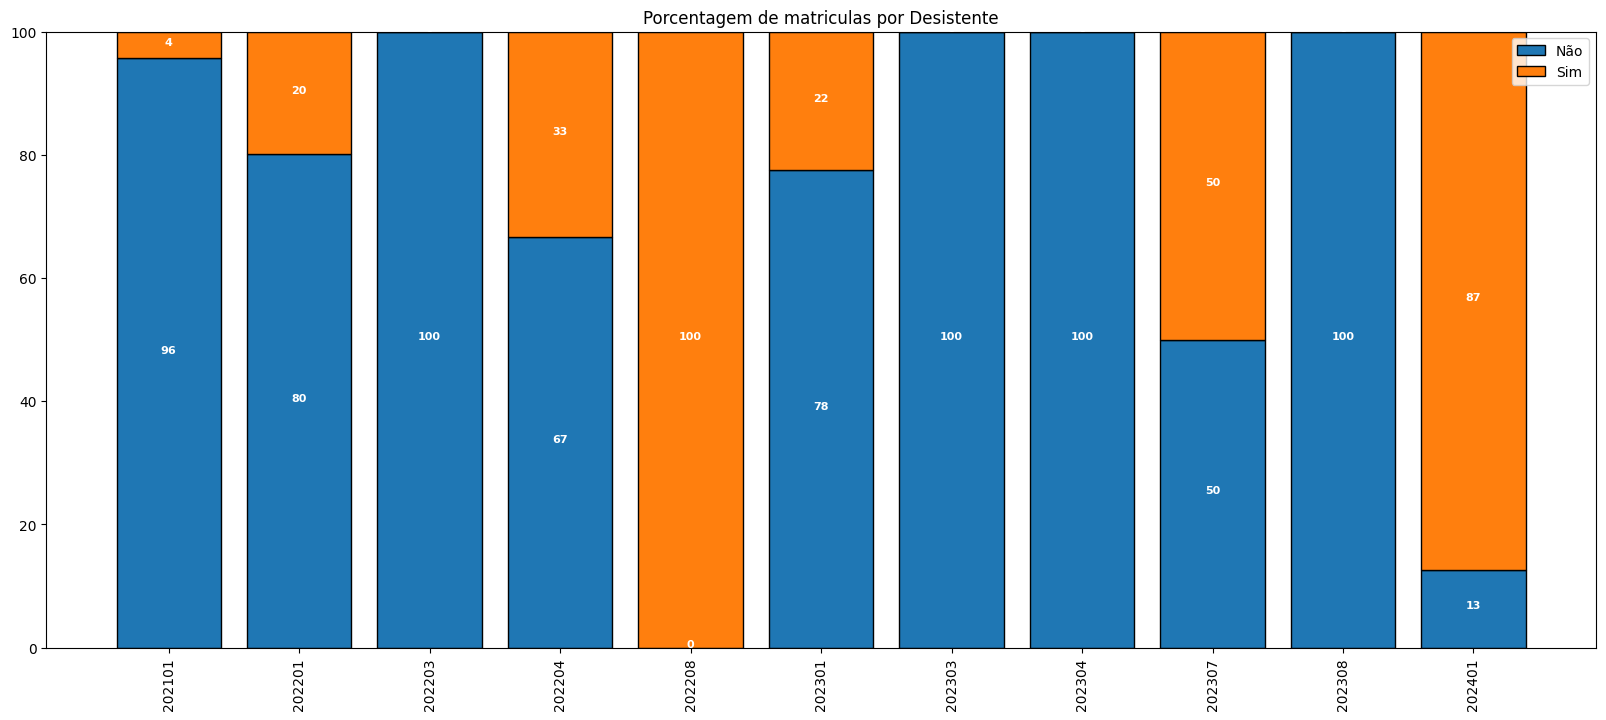

In [38]:
# Qtd de alunos por ano e mês da inativação
plot_qtd_stack_bar(alunos_turmas_filtered_df, x='AnoMesAtivo', y='IdAluno', group=None, figsize=(20,8))
# % qtd de alunos por ano e mês da inativação
plot_porcentagem_stack_bar(df=alunos_turmas_filtered_df, x='AnoMesAtivo', y='IdAluno', group='InativacaoPorFaltaAdaptacao', figsize=(20,8))
# % qtd de alunos por ano e mês de desistente
plot_porcentagem_stack_bar(df=alunos_turmas_filtered_df, x='AnoMesAtivo', y='IdAluno', group='Desistente', figsize=(20,8))

# Visualização do relacionamento entre as tabelas

In [ ]:
# import pandas as pd
# import networkx as nx
# import matplotlib.pyplot as plt

# def visualize_dataframe_relationships(dataframes_dict, layout='spring_layout', filename='graph.png'):
#     """
#     Visualizes the relationships between pandas DataFrames based on shared columns.

#     Args:
#     dataframes_dict: A dictionary of pandas DataFrames where keys are DataFrame names.
#     layout: The layout algorithm to use (default: 'spring_layout'). Other options: 'circular_layout', 'shell_layout', 'spectral_layout', 'random_layout'

#     Returns:
#     None
#     """
#     plt.figure(figsize=(30, 30))

#     G = nx.Graph()

#     # Add nodes with DataFrame names
#     for df_name, df in dataframes_dict.items():
#         G.add_node(df_name)

#     # Add edges with shared columns
#     for df_name1, df1 in dataframes_dict.items():
#         for df_name2, df2 in dataframes_dict.items():
#             if df_name1 != df_name2:
#                 shared_cols = set(df1.columns) & set(df2.columns)
#                 for col in shared_cols:
#                     G.add_edge(df_name1, df_name2, label=col)

#     # Add edges for all shared columns between all DataFrames
#     all_columns = set()
#     for df in dataframes_dict.values():
#         all_columns.update(df.columns)

#     for col in all_columns:
#         dfs_with_col = [df_name for df_name, df in dataframes_dict.items() if col in df.columns]
#         for i in range(len(dfs_with_col) - 1):
#             for j in range(i + 1, len(dfs_with_col)):
#                 G.add_edge(dfs_with_col[i], dfs_with_col[j], label=col)

#     # Choose layout algorithm
#     if layout == 'circular_layout':
#         pos = nx.circular_layout(G)
#     elif layout == 'shell_layout':
#         pos = nx.shell_layout(G)
#     elif layout == 'spectral_layout':
#         pos = nx.spectral_layout(G)
#     elif layout == 'random_layout':
#         pos = nx.random_layout(G)
#     else:
#         pos = nx.spring_layout(G, k=50)

#     # Visualize the graph
#     nx.draw_networkx_nodes(G, pos, node_size=100)
#     nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')
#     nx.draw_networkx_edges(G, pos, width=1)
#     edge_labels = nx.get_edge_attributes(G, 'label')
#     nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

#     plt.axis('off')
#     # nx.write_gexf(G, "test.gexf")
#     plt.savefig(filename, format='png', dpi=1000)  # Save the figure
#     # plt.show()


In [ ]:
# visualize_dataframe_relationships(DictTodasTabelas)